In [31]:
import Permutations as pm
from ToolsForQuasiCord import *

import sympy
sympy.init_printing()

import itertools
from tqdm.notebook import tqdm

import plotly.express as px
from plotly.subplots import make_subplots

import pandas as pd

## Setting $T>L>R$. On each $T-L$ and $R$, changing $B$ and $L$ one by one

In [144]:
def map_maker(delta=1, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = 1 + i*Col + j
        df = pd.read_csv(f"data/T-L={delta}_R={r}_100x100.csv")
        mat = df.values[:size,:size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    # ---
    fig.update_layout(
        height=320 * Row, width=24300 * Col, title="T>L>R, T-L={}".format(delta)
    )
    return fig

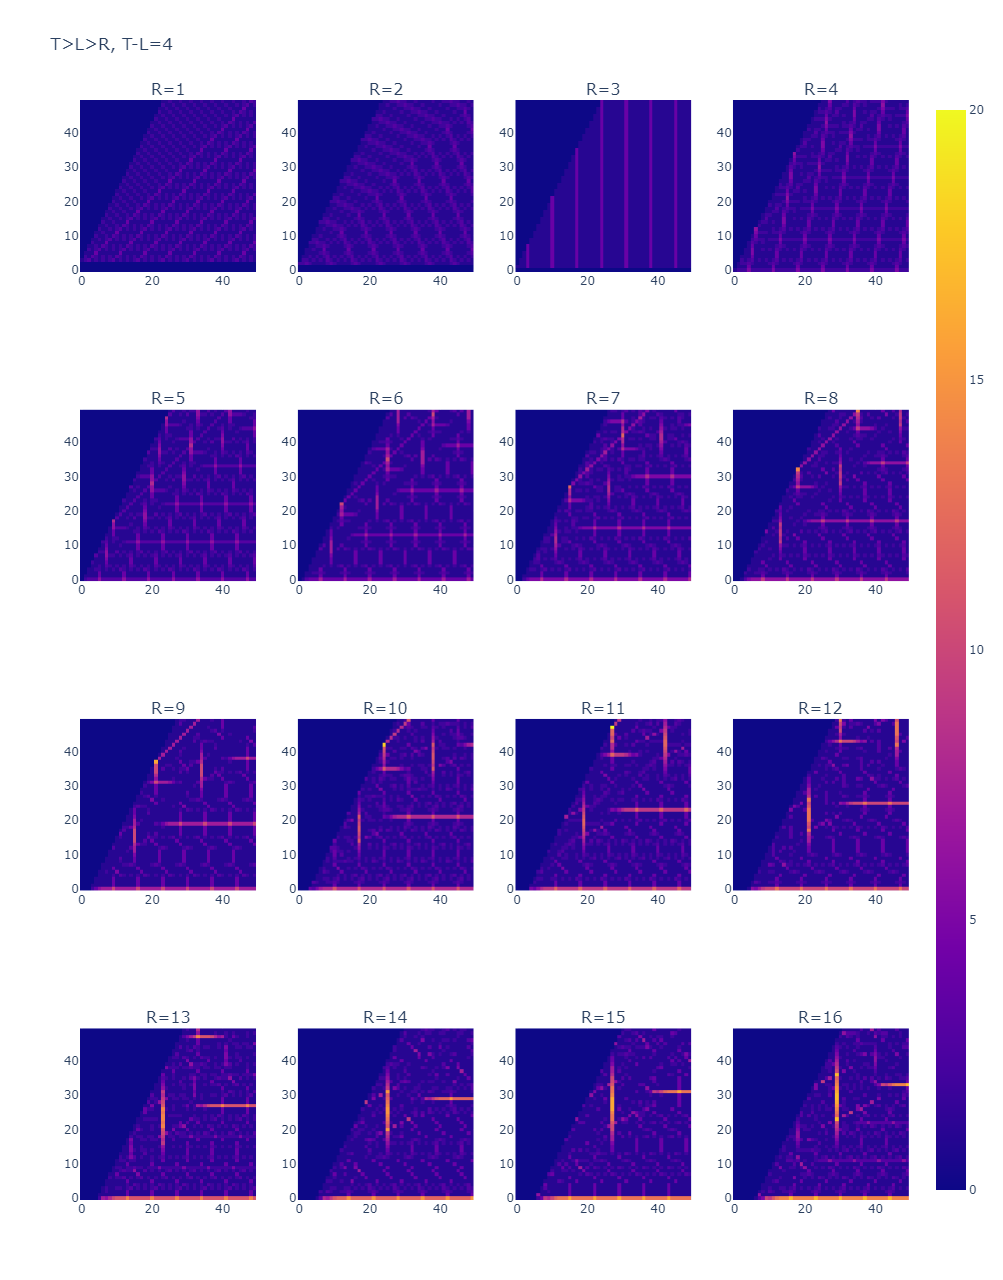

In [148]:
map_maker(4,50,4,4).show()

### animation

In [184]:
delta = 2
size = 50
data = []
for r in range(1,16+1):
    df = pd.read_csv(f"data/T-L={delta}_R={r}_100x100.csv")
    mat = df.values[:size,:size]
    data += [mat]
    # ---
px.imshow(data, animation_frame=0)

AttributeError: 'list' object has no attribute 'shape'

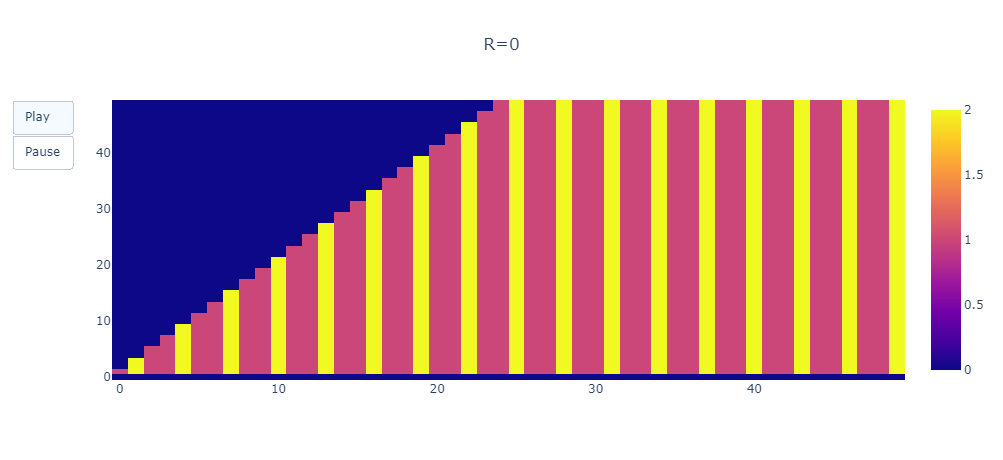

In [206]:
N = 16
fig = go.Figure(
    data=[go.Heatmap(z=data[0], zmax=20)],
    layout=go.Layout(
        title="R=0",
        title_x=0.5,
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None]),
                    dict(label="Pause",
                         method="animate",
                         args=[None,
                               {"frame": {"duration": 0, "redraw": False},
                                "mode": "immediate",
                                "transition": {"duration": 0}}],
                         )])]
    ),
    frames=[go.Frame(data=[go.Heatmap(z=data[i], zmax=20)],
                     layout=go.Layout(title_text=f"R={i}")) 
            for i in range(1, N)]
)
fig.update_layout(height = 460, width = 460)
fig.show()

## $T-L=R+1$ series

$[L+R+1,L,B,R],~ (1 \leq R \leq L \leq T)$

__予想:__  
* $\forall B, |[L+R+1,L,B,R]|=|[L+R+1,L,1,R]|$
* $|[(L)+R+1,L,1,R]|=R+1$ 

In [92]:
def map_maker_01(delta=1, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = 1 + i*Col + j
        df = pd.read_csv(f"data/T-L={delta}_R={r}_100x100.csv")
        mat = df.values[:size,:size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    # ---
    fig.update_layout(
        height=380 * Row, width=300 * Col, title="T>L>R, T-L={}".format(delta)
    )
    return fig

  0%|          | 0/16 [00:00<?, ?it/s]

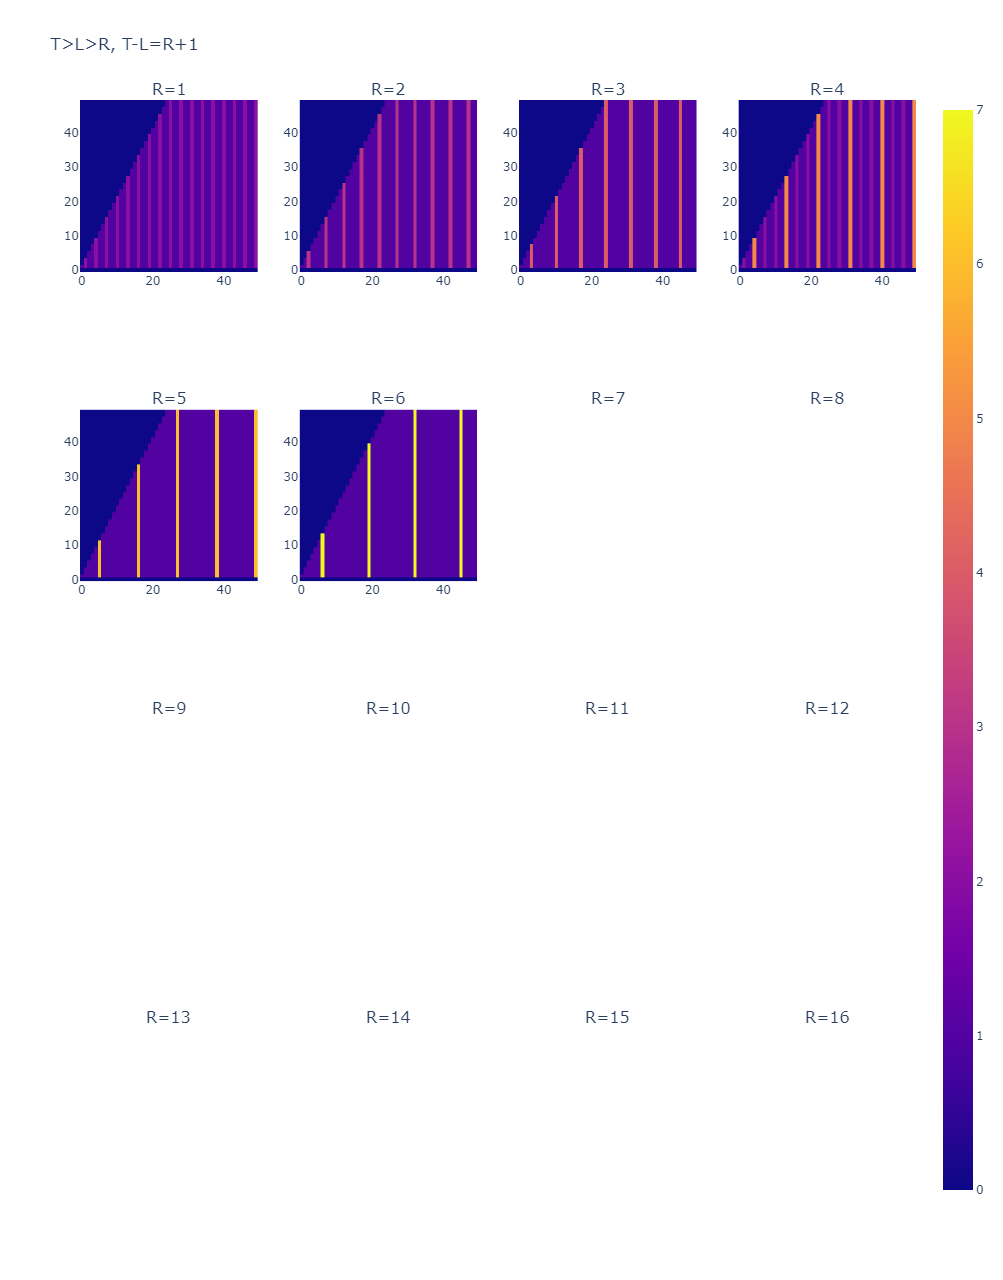

In [205]:
size = 50
Row, Col = 4, 4
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    try:
        df = pd.read_csv(f"data/T-L={r+1}_R={r}_100x100.csv")
        mat = df.values[:size,:size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except: pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title="T>L>R, T-L=R+1")
fig.show()

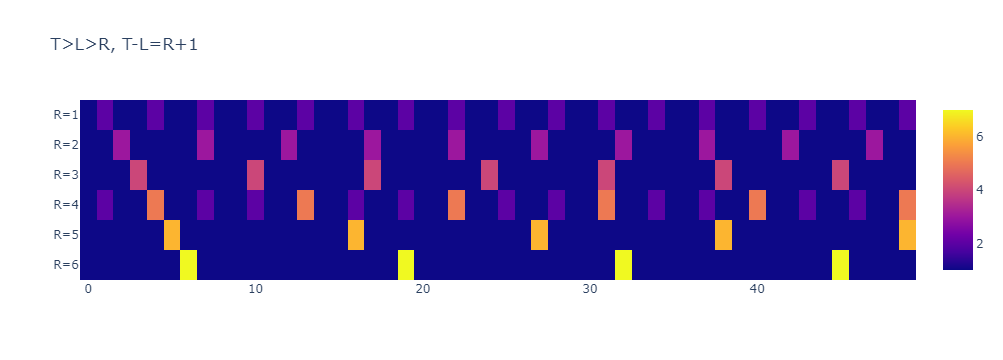

In [204]:
N = 16
size = 50
# ---
mat = []
ylabel = []
for r in range(1, N+1):
    try:
        df = pd.read_csv(f"data/T-L={r+1}_R={r}_100x100.csv")
        mat += [df.values[1, :size]]
        ylabel += [f"R={r}"]
    except: pass
# ---
# display(sympy.Matrix(mat))
fig = px.imshow(mat, y=ylabel, aspect='equal', title="T>L>R, T-L=R+1")
# ---
fig.update_layout(height=52*len(ylabel), width=960, title="T>L>R, T-L=R+1")
fig.show()